# iShares S&P 500 Top 20 ETF 日足

In [7]:
import sys
sys.path.append('..')

import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [8]:
pattern = re.compile(r'(.+)\.T')

symbol = '313A.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1y')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-02-27 00:00:00+09:00,190.699997,192.000000,189.800003,191.899994,225230,0.0,0.0,0.0
2025-02-28 00:00:00+09:00,188.100006,188.399994,185.899994,187.600006,308840,0.0,0.0,0.0
2025-03-03 00:00:00+09:00,192.100006,192.199997,190.899994,191.600006,395190,0.0,0.0,0.0
2025-03-04 00:00:00+09:00,185.399994,186.100006,183.800003,186.100006,707430,0.0,0.0,0.0
2025-03-05 00:00:00+09:00,185.800003,186.000000,184.899994,185.199997,800280,0.0,0.0,0.0


## 日足チャートとパラボリック SAR

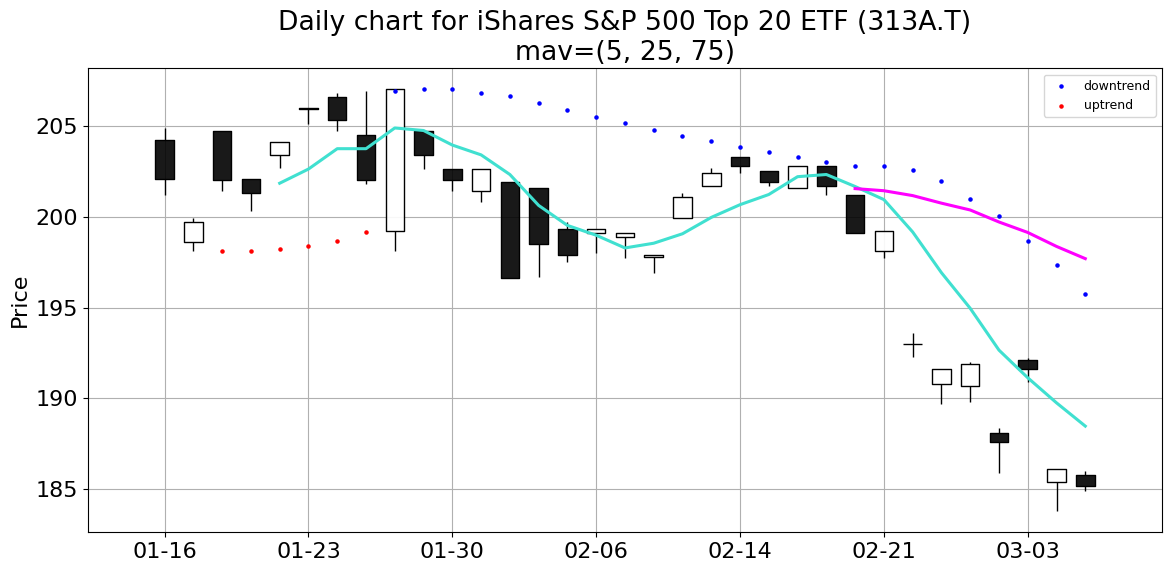

In [9]:
dict_psar = psar(df)

plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=5,
        color='blue',
        label='downtrend',
        ax=ax
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=5,
        color='red',
        label='uptrend',
        ax=ax
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    mav=(5, 25, 75),
    volume=False,
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax.grid()
ax.legend(loc='best', fontsize=9)


plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [10]:
df.tail(2)['Close']

Date
2025-03-04 00:00:00+09:00    186.100006
2025-03-05 00:00:00+09:00    185.199997
Name: Close, dtype: float64

In [11]:
df.tail(2)['Close'].diff()

Date
2025-03-04 00:00:00+09:00         NaN
2025-03-05 00:00:00+09:00   -0.900009
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(5).mean().tail(2)

Date
2025-03-04 00:00:00+09:00    189.760004
2025-03-05 00:00:00+09:00    188.480002
Name: Close, dtype: float64

In [13]:
df['Close'].rolling(25).mean().tail(2)

Date
2025-03-04 00:00:00+09:00    198.364001
2025-03-05 00:00:00+09:00    197.692001
Name: Close, dtype: float64

In [14]:
df['Close'].rolling(75).mean().tail(2)

Date
2025-03-04 00:00:00+09:00   NaN
2025-03-05 00:00:00+09:00   NaN
Name: Close, dtype: float64